In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [3]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [4]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


**Prior model 1**

Prior 1 - age

In [8]:
model_age = CmdStanModel(stan_file='prior1.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        fixed_param=False,
                        seed=24252)

21:21:07 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior1.stan to exe file /root/data-analytics/prior1
21:21:34 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior1
21:21:34 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:21:34 - cmdstanpy - INFO - CmdStan done processing.
21:21:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior1_model_namespace::write_array: age is 29.5223, but must be greater than or equal to 30.000000 (in 'prior1.stan', line 4, column 4 to column 54)
	Exception: prior1_model_namespace::write_array: age is 27.4699, but must be greater than or equal to 30.000000 (in 'prior1.stan', line 4, column 4 to column 54)
	Exception: prior1_model_namespace::write_array: age is 99.0095, but must be less than or equal to 90.000000 (in 'prior1.stan', line 4, column 4 to column 54)
Consider re-running with show_console=True if the above output is unclear!


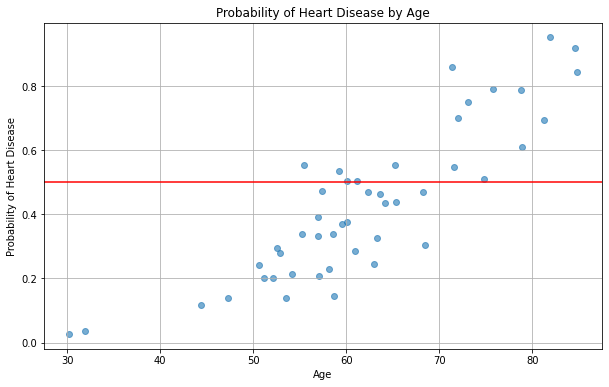

In [9]:
prior1 = sim.draws_pd()

plt.figure(figsize=(10, 6))
plt.scatter(prior1['age'], prior1['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age')
plt.grid(True)
plt.show()

Prior 2 - trestbps (resting blood pressure)

In [12]:
model_age = CmdStanModel(stan_file='prior2.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)

21:21:58 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior2.stan to exe file /root/data-analytics/prior2
21:22:20 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior2
21:22:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:22:20 - cmdstanpy - INFO - CmdStan done processing.
21:22:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior2_model_namespace::write_array: bps is 86.2381, but must be greater than or equal to 94.000000 (in 'prior2.stan', line 4, column 4 to column 56)
	Exception: prior2_model_namespace::write_array: bps is 71.0283, but must be greater than or equal to 94.000000 (in 'prior2.stan', line 4, column 4 to column 56)
	Exception: prior2_model_namespace::write_array: bps is 210.229, but must be less than or equal to 200.000000 (in 'prior2.stan', line 4, column 4 to column 56)
	Exception: prior2_model_namespace::write_array: bps is 61.079, but must be greater than or equal to 94.000000 (in 'prior2.stan', line 4, column 4 to column 56)
Consider re-running with show_console=True if the above output is unclear!


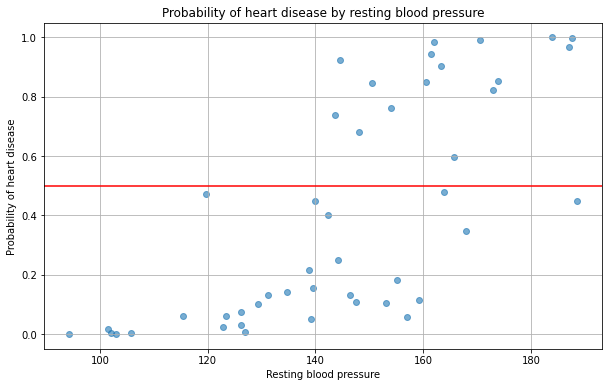

In [13]:
prior2 = sim.draws_pd()

plt.figure(figsize=(10, 6))
plt.scatter(prior2['bps'], prior2['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('Resting blood pressure')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by resting blood pressure')
plt.grid(True)
plt.show()

Prior 3 - thalach (maximum heart rate achieved)

In [20]:
model_age = CmdStanModel(stan_file='prior3.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)

21:23:30 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior3.stan to exe file /root/data-analytics/prior3
21:23:55 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior3
21:23:55 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:23:55 - cmdstanpy - INFO - CmdStan done processing.
21:23:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior3_model_namespace::write_array: thalach is 61.0283, but must be greater than or equal to 70.000000 (in 'prior3.stan', line 4, column 4 to column 60)
	Exception: prior3_model_namespace::write_array: thalach is 200.229, but must be less than or equal to 190.000000 (in 'prior3.stan', line 4, column 4 to column 60)
	Exception: prior3_model_namespace::write_array: thalach is 51.079, but must be greater than or equal to 70.000000 (in 'prior3.stan', line 4, column 4 to column 60)
Consider re-running with show_console=True if the above output is unclear!


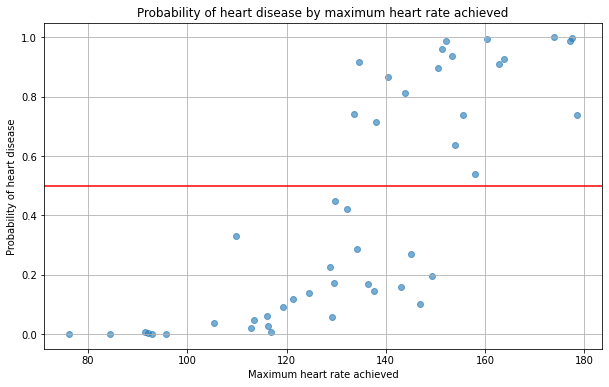

In [21]:
prior3 = sim.draws_pd()

plt.figure(figsize=(10, 6))
plt.scatter(prior3['thalach'], prior3['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by maximum heart rate achieved')
plt.grid(True)
plt.show()

Prior 1 - combined

In [130]:
model1 = CmdStanModel(stan_file='prior_combined1.stan')
sim = model1.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model1 = sim.draws_pd()

22:33:02 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior_combined1.stan to exe file /root/data-analytics/prior_combined1
22:33:31 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior_combined1
22:33:31 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

22:33:31 - cmdstanpy - INFO - CmdStan done processing.
22:33:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior_combined1_model_namespace::write_array: age is 25.5142, but must be greater than or equal to 30.000000 (in 'prior_combined1.stan', line 5, column 4 to column 54)
	Exception: prior_combined1_model_namespace::write_array: bps is 61.079, but must be greater than or equal to 94.000000 (in 'prior_combined1.stan', line 10, column 4 to column 56)
	Exception: prior_combined1_model_namespace::write_array: age is 8.72338, but must be greater than or equal to 30.000000 (in 'prior_combined1.stan', line 5, column 4 to column 54)
	Exception: prior_combined1_model_namespace::write_array: bps is 78.5301, but must be greater than or equal to 94.000000 (in 'prior_combined1.stan', line 10, column 4 to column 56)
	Exception: prior_combined1_model_namespace::write_array: bps is 30.6828, but must be greater than or equal to 94.000000 (in 'prior_combined1.stan', line 10, c

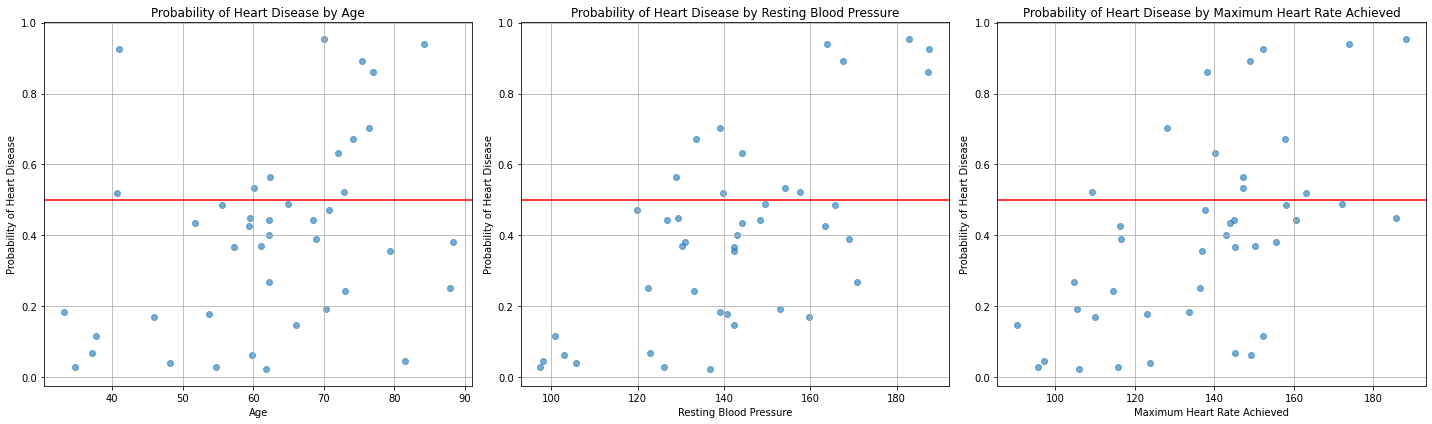

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# First subplot
axs[0].scatter(prior_model1['age'], prior_model1['combined_heart_disease_prob'], alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)

# Second subplot
axs[1].scatter(prior_model1['bps'], prior_model1['combined_heart_disease_prob'], alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)

# Third subplot
axs[2].scatter(prior_model1['thalach'], prior_model1['combined_heart_disease_prob'], alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Prior model 2**

Prior 4 - cholesterol

In [132]:
model_age = CmdStanModel(stan_file='prior4.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)

22:35:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

22:35:11 - cmdstanpy - INFO - CmdStan done processing.
22:35:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior4_model_namespace::write_array: chol is 120.794, but must be greater than or equal to 130.000000 (in 'prior4.stan', line 4, column 4 to column 59)
	Exception: prior4_model_namespace::write_array: chol is 70.0943, but must be greater than or equal to 130.000000 (in 'prior4.stan', line 4, column 4 to column 59)
	Exception: prior4_model_namespace::write_array: chol is 36.93, but must be greater than or equal to 130.000000 (in 'prior4.stan', line 4, column 4 to column 59)
Consider re-running with show_console=True if the above output is unclear!


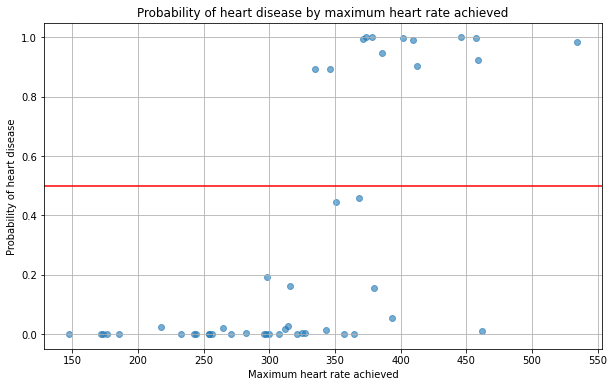

In [69]:
prior4 = sim.draws_pd()

plt.figure(figsize=(10, 6))
plt.scatter(prior4['chol'], prior4['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('Serum cholestoral in mg/dl')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by serum cholestoral in mg/dl')
plt.grid(True)
plt.show()

Prior 5 - oldpeak

In [101]:
model_age = CmdStanModel(stan_file='prior5.stan')
sim = model_age.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)

22:13:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

22:13:19 - cmdstanpy - INFO - CmdStan done processing.
22:13:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior5_model_namespace::write_array: old_peak is -0.299057, but must be greater than or equal to 0.000000 (in 'prior5.stan', line 4, column 4 to column 55)
	Exception: prior5_model_namespace::write_array: old_peak is -0.6307, but must be greater than or equal to 0.000000 (in 'prior5.stan', line 4, column 4 to column 55)
Consider re-running with show_console=True if the above output is unclear!


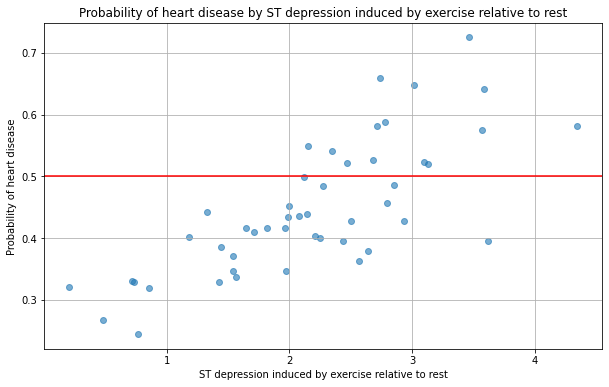

In [102]:
prior5 = sim.draws_pd()

plt.figure(figsize=(10, 6))
plt.scatter(prior5['old_peak'], prior5['heart_disease_prob'], alpha=0.6)
plt.axhline(y=0.5, color='red', linestyle='-')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by ST depression induced by exercise relative to rest')
plt.grid(True)
plt.show()

Prior 2 - combined

In [133]:
model2 = CmdStanModel(stan_file='prior_combined2.stan')
sim = model2.sample(iter_sampling=50,
                        iter_warmup=1000,
                        chains=1,
                        seed=242522,)
prior_model2 = sim.draws_pd()

22:35:23 - cmdstanpy - INFO - compiling stan file /root/data-analytics/prior_combined2.stan to exe file /root/data-analytics/prior_combined2
22:35:49 - cmdstanpy - INFO - compiled model executable: /root/data-analytics/prior_combined2
22:35:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

22:35:49 - cmdstanpy - INFO - CmdStan done processing.
22:35:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: prior_combined2_model_namespace::write_array: chol is 120.794, but must be greater than or equal to 130.000000 (in 'prior_combined2.stan', line 20, column 4 to column 59)
	Exception: prior_combined2_model_namespace::write_array: age is 25.5142, but must be greater than or equal to 30.000000 (in 'prior_combined2.stan', line 5, column 4 to column 54)
	Exception: prior_combined2_model_namespace::write_array: thalach is 27.4468, but must be greater than or equal to 70.000000 (in 'prior_combined2.stan', line 15, column 4 to column 60)
	Exception: prior_combined2_model_namespace::write_array: thalach is 68.5301, but must be greater than or equal to 70.000000 (in 'prior_combined2.stan', line 15, column 4 to column 60)
	Exception: prior_combined2_model_namespace::write_array: age is 5.34138, but must be greater than or equal to 30.000000 (in 'prior_combined2.stan'

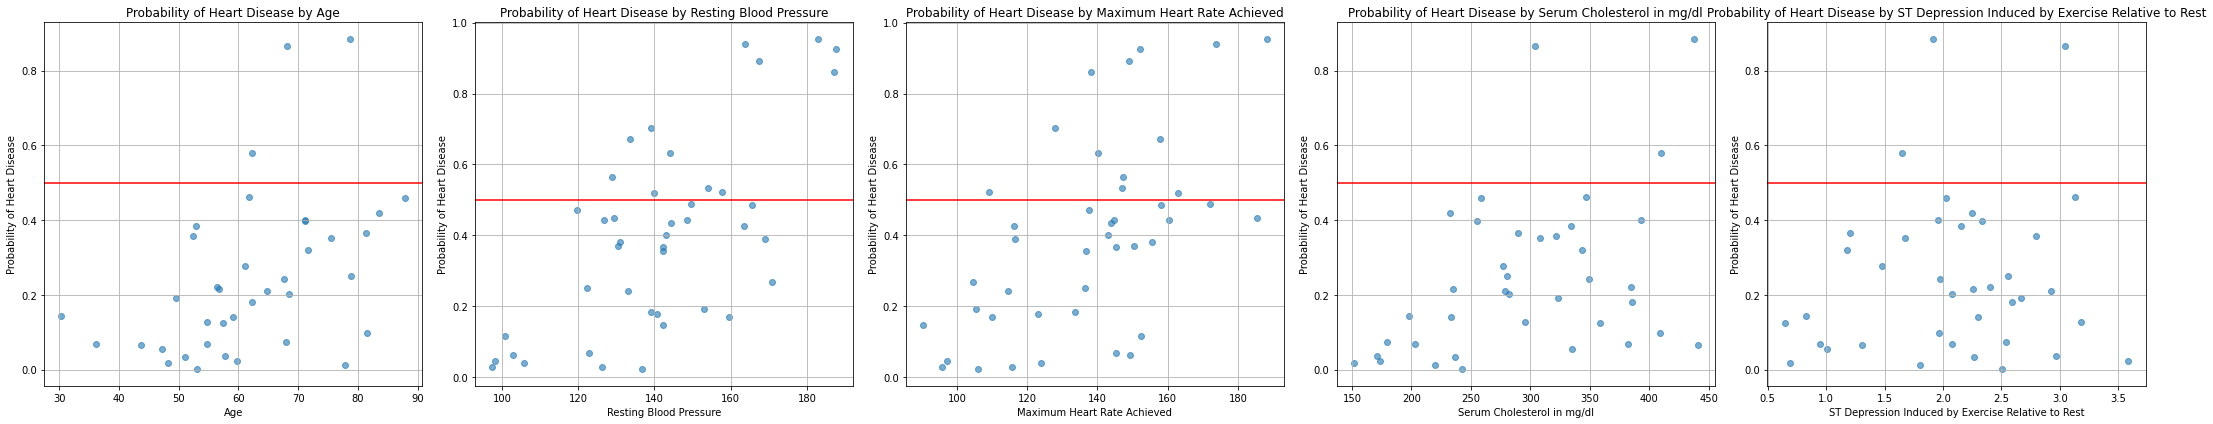

In [134]:
fig, axs = plt.subplots(1, 5, figsize=(30, 6))

# First subplot
axs[0].scatter(prior_model2['age'], prior_model2['combined_heart_disease_prob'], alpha=0.6)
axs[0].axhline(y=0.5, color='red', linestyle='-')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Probability of Heart Disease')
axs[0].set_title('Probability of Heart Disease by Age')
axs[0].grid(True)

# Second subplot
axs[1].scatter(prior_model1['bps'], prior_model1['combined_heart_disease_prob'], alpha=0.6)
axs[1].axhline(y=0.5, color='red', linestyle='-')
axs[1].set_xlabel('Resting Blood Pressure')
axs[1].set_ylabel('Probability of Heart Disease')
axs[1].set_title('Probability of Heart Disease by Resting Blood Pressure')
axs[1].grid(True)

# Third subplot
axs[2].scatter(prior_model1['thalach'], prior_model1['combined_heart_disease_prob'], alpha=0.6)
axs[2].axhline(y=0.5, color='red', linestyle='-')
axs[2].set_xlabel('Maximum Heart Rate Achieved')
axs[2].set_ylabel('Probability of Heart Disease')
axs[2].set_title('Probability of Heart Disease by Maximum Heart Rate Achieved')
axs[2].grid(True)

# Fourth subplot
axs[3].scatter(prior_model2['chol'], prior_model2['combined_heart_disease_prob'], alpha=0.6)
axs[3].axhline(y=0.5, color='red', linestyle='-')
axs[3].set_xlabel('Serum Cholesterol in mg/dl')
axs[3].set_ylabel('Probability of Heart Disease')
axs[3].set_title('Probability of Heart Disease by Serum Cholesterol in mg/dl')
axs[3].grid(True)

# Fifth subplot
axs[4].scatter(prior_model2['old_peak'], prior_model2['combined_heart_disease_prob'], alpha=0.6)
axs[4].axhline(y=0.5, color='red', linestyle='-')
axs[4].set_xlabel('ST Depression Induced by Exercise Relative to Rest')
axs[4].set_ylabel('Probability of Heart Disease')
axs[4].set_title('Probability of Heart Disease by ST Depression Induced by Exercise Relative to Rest')
axs[4].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()